# Research stat arbitrage between ETC, LTC in comparison with BTC

In [1]:
import pandas as pd
import statsmodels.api as sm
pd.set_option('display.precision', 10)

import matplotlib.pyplot as plt

/home/vampire/PycharmProjects/mikasa_ed/venv/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df_etc = pd.read_csv('../datasets/5min/BTC_ETC.csv', index_col=0)
df_etc.head()

,open,high,low,close,volume
datetime,,,,,
1474205100,0.00215675,0.00216589,0.00215675,0.00215698,1.44560130
1474205400,0.00216589,0.00216656,0.00215221,0.00216620,6.87366125
1474205700,0.00216134,0.00216598,0.00215652,0.00216598,0.18328989
1474206000,0.00215675,0.00216591,0.00215675,0.00216399,0.05270004
1474206300,0.00216160,0.00216758,0.00216156,0.00216754,3.06596880


In [4]:
df_eth = pd.read_csv('../datasets/5min/BTC_ETH.csv', index_col=0)
df_eth.head()

,open,high,low,close,volume
datetime,,,,,
1474205100,0.02100020,0.02103851,0.02100009,0.02103850,4.29664207
1474205400,0.02104173,0.02104900,0.02103775,0.02104603,3.98722880
1474205700,0.02104189,0.02104189,0.02100002,0.02103776,19.96695320
1474206000,0.02102487,0.02103777,0.02100000,0.02103023,27.70738379
1474206300,0.02100101,0.02103777,0.02100100,0.02103600,3.87961046


In [5]:
df_etc['open'].corr(df_eth['open'])

0.94349142895338323

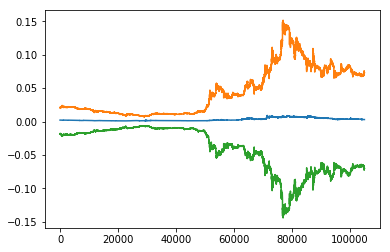

In [7]:
X = df_etc['close'].values
Y = df_eth['close'].values
Z = X - Y
plt.plot(X)
plt.plot(Y)
plt.plot(Z)
plt.show()

In [8]:
hedge_ratio = sm.OLS(Y, X).fit()

In [9]:
hedge_ratio = hedge_ratio.params[0]

In [10]:
spread = Y - hedge_ratio * X

In [11]:
spread.shape

(105120,)

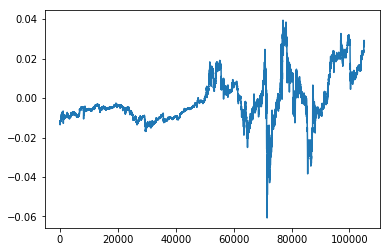

In [12]:
plt.plot(spread)
plt.show()

In [13]:
zscore = ((spread - spread.mean()) / spread.std())

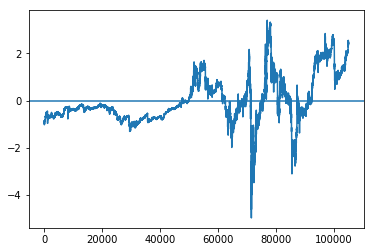

In [14]:
plt.plot(zscore)
plt.axhline(0)
plt.show()